# 1. Understanding the Problem
# The goal: classify iris flowers into one of three species # based on four features (sepal length, sepal width, # petal length, petal width).

# 2. Importing libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import joblib  # for saving models

# 3. Dataset Preparation

In [16]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

print(df.head())
print("\nDataset shape:", df.shape)
print("\nClass distribution:\n", df['species'].value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataset shape: (150, 5)

Class distribution:
 species
0    50
1    50
2    50
Name: count, dtype: int64


# 4. Data Exploration & Visualization

In [17]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


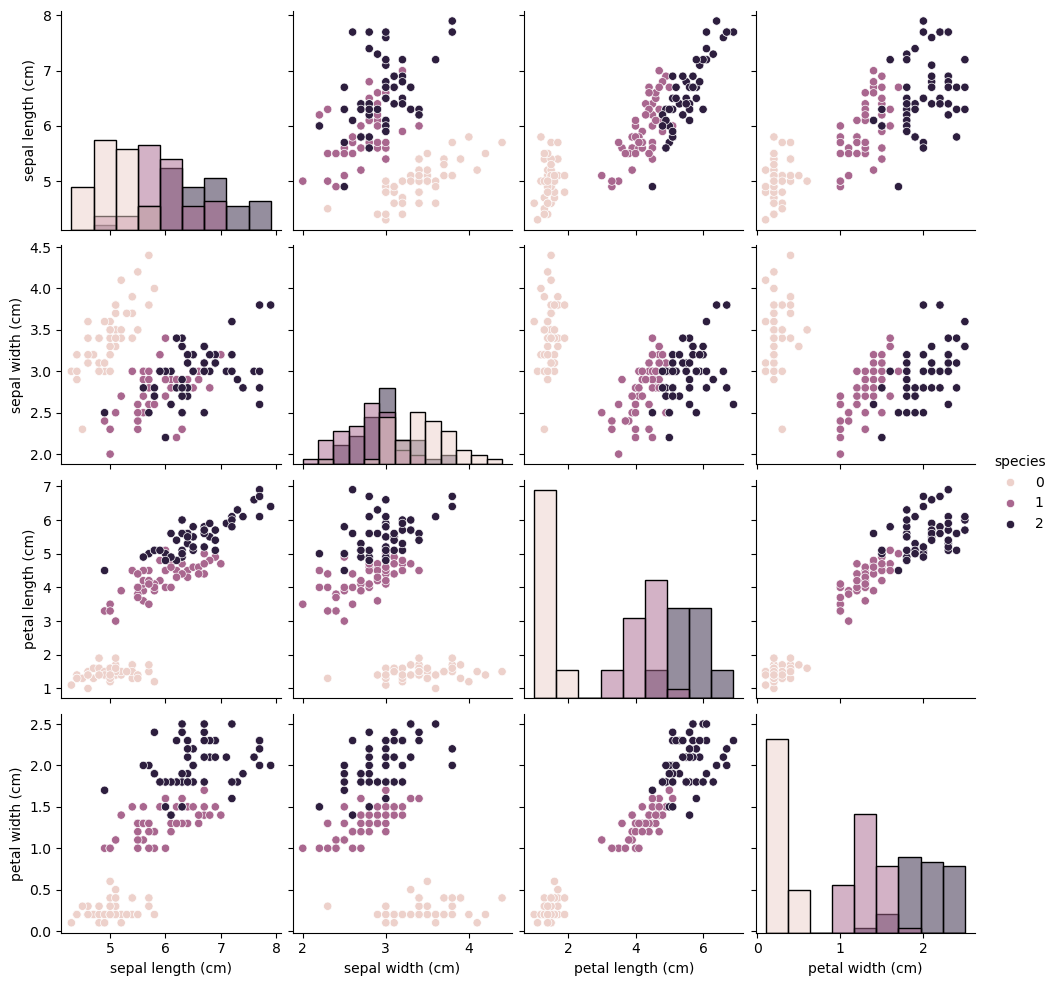

In [12]:
# Pair plot
sns.pairplot(df, hue="species", diag_kind="hist")
plt.show()

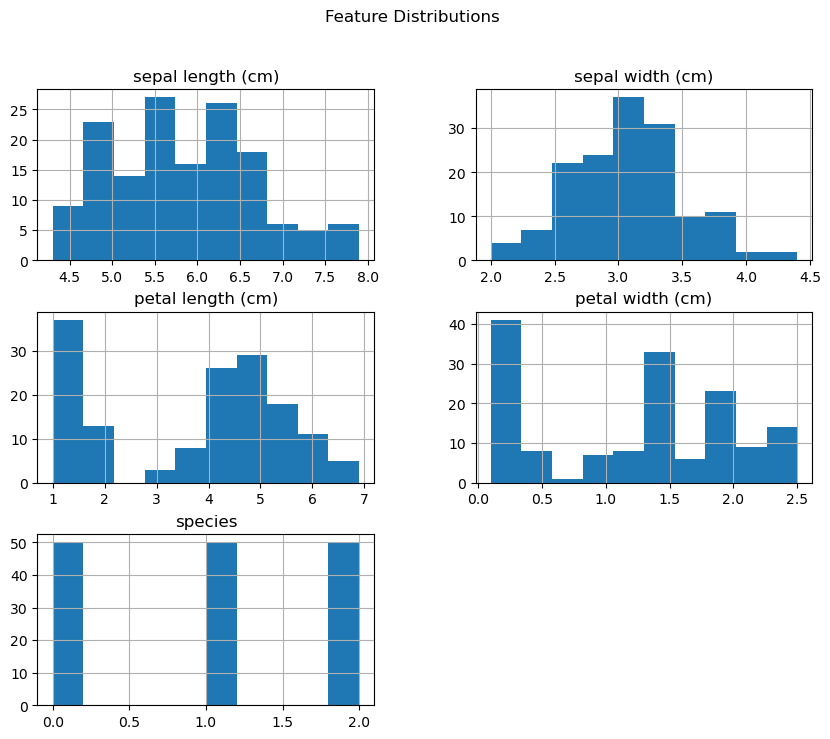

In [13]:
# Histograms
df.hist(figsize=(10,8))
plt.suptitle("Feature Distributions")
plt.show()

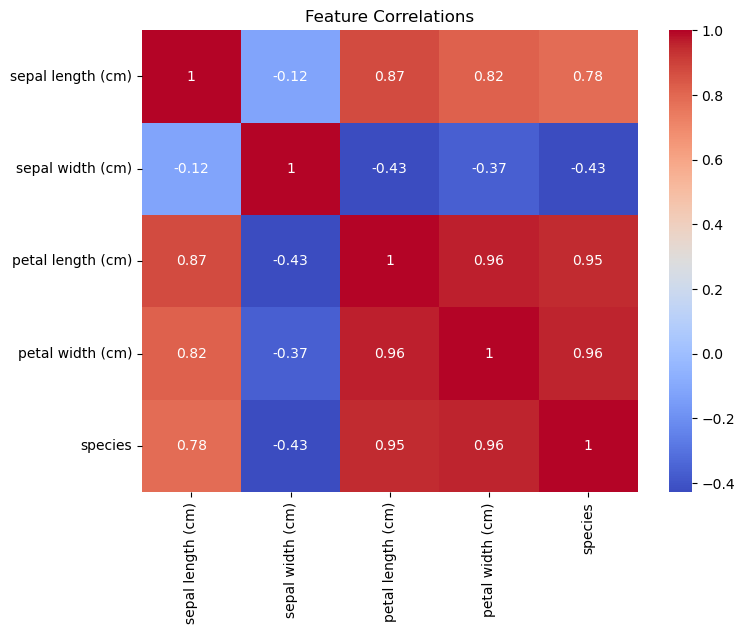

In [14]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

# 5. Data Preprocessing

In [19]:
X = df.drop("species", axis=1)
y = df["species"]

In [20]:
# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

Train shape: (120, 4)  Test shape: (30, 4)


# 6. Model Selection and Training

In [23]:
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=200)
}

In [24]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

In [25]:
print("\nModel Accuracies:", results)


Model Accuracies: {'KNN': 0.9333333333333333, 'Decision Tree': 0.9333333333333333, 'Random Forest': 0.9, 'SVM': 0.9666666666666667, 'Logistic Regression': 0.9333333333333333}


# 7. Model Evaluation (example with Random Forest)

In [26]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [27]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



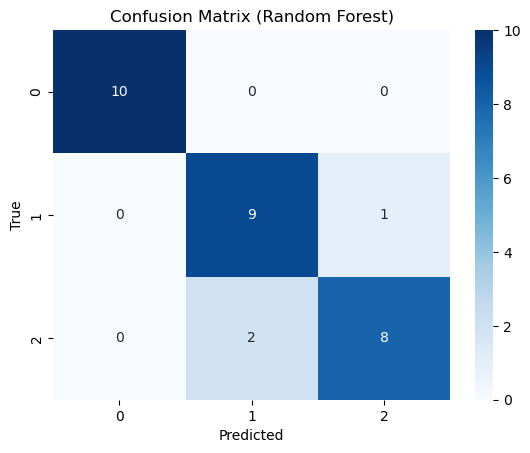

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 8. Hyperparameter Tuning (SVM Example)

In [29]:
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": [1, 0.1, 0.01],
    "kernel": ["rbf", "linear"]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'linear']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [30]:
print("\nBest Parameters (SVM):", grid.best_params_)
print("Best CV Score (SVM):", grid.best_score_)


Best Parameters (SVM): {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Score (SVM): 0.9833333333333332


In [31]:
# Cross-validation check
cv_scores = cross_val_score(grid.best_estimator_, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean CV Accuracy: 0.9800000000000001


# 9. Model Interpretation & Insights

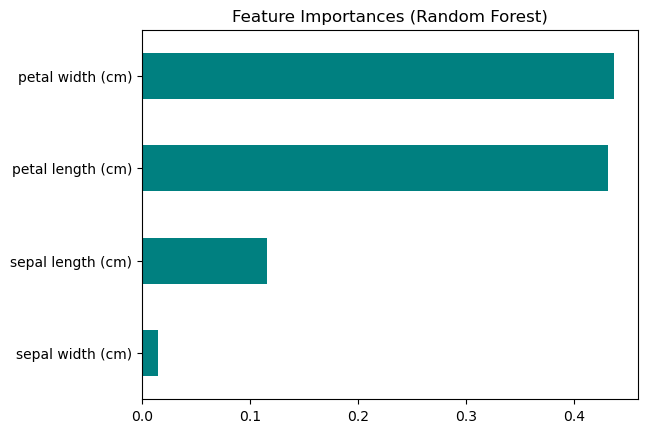

In [32]:
# Feature importance (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
importances = pd.Series(clf.feature_importances_, index=iris.feature_names)

importances.sort_values().plot(kind="barh", color="teal")
plt.title("Feature Importances (Random Forest)")
plt.show()

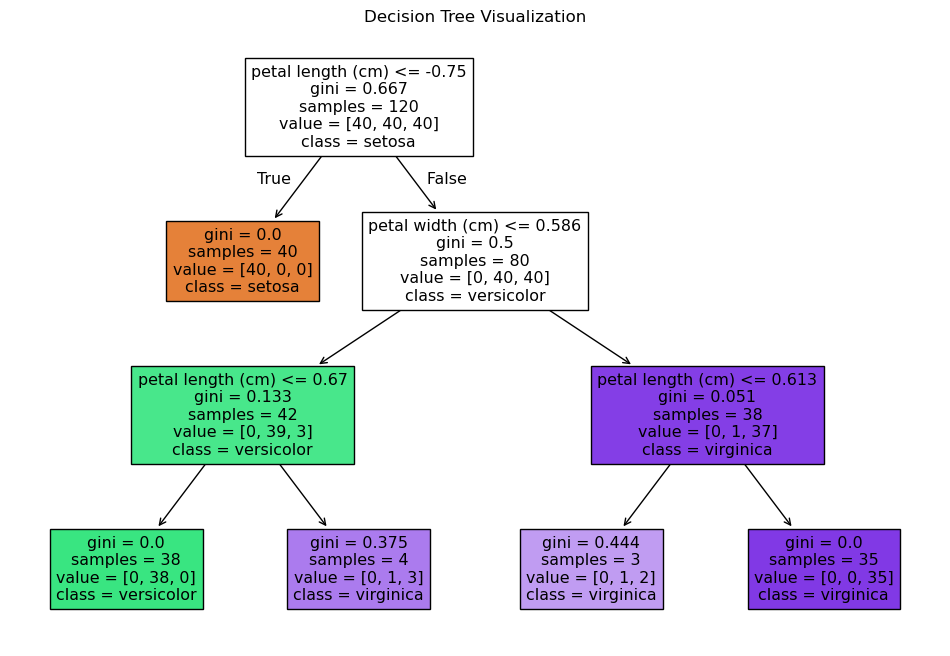

In [33]:
# Decision Tree Visualization
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(tree_model, feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# 10. Save Model for Deployment

In [34]:
joblib.dump(grid.best_estimator_, "iris_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nModel and scaler saved for deployment.")


Model and scaler saved for deployment.
